# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [4]:
# Definir si se ejecuta en Google Colab o localmente
RunInColab = True  # (False: no  | True: sí)

# Si se ejecuta en Google Colab:
if RunInColab:
    from google.colab import drive
    drive.mount('/content/drive')

    # Definir la ruta del archivo en la carpeta NotebooksProfessor
    Ruta = "/content/drive/My Drive/NotebooksProfessor/"

else:
    # Si se ejecuta localmente, definir la ruta donde se encuentra el archivo
    Ruta = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [9]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [32]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [34]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [35]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

<ipython-input-35-795b80ddcfde>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [8]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

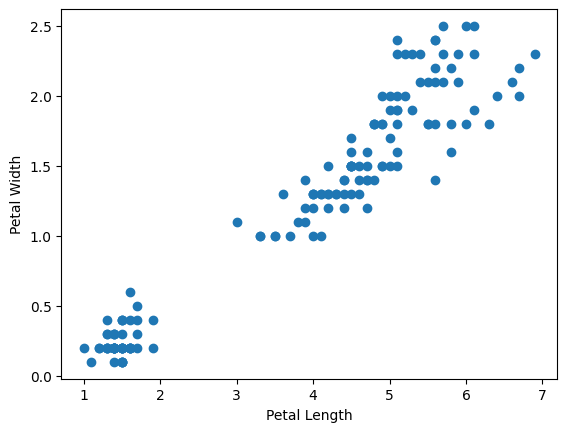

In [36]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


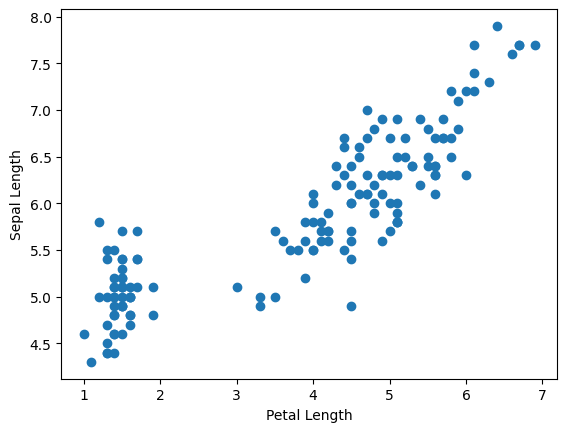

In [37]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


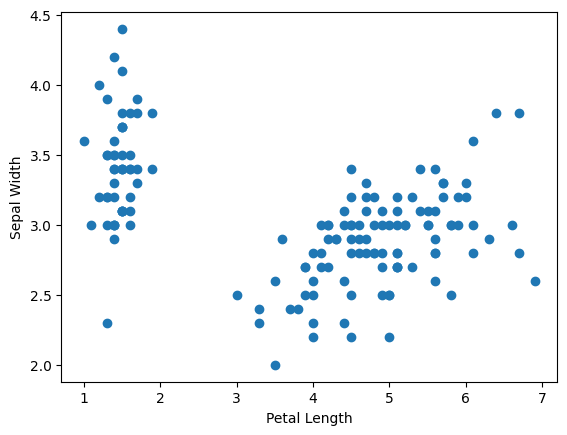

In [38]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


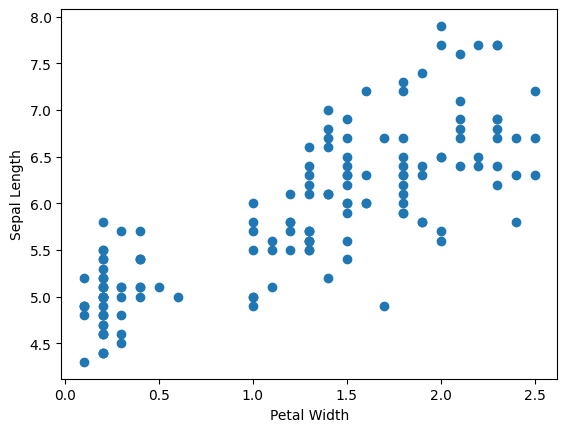

In [39]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


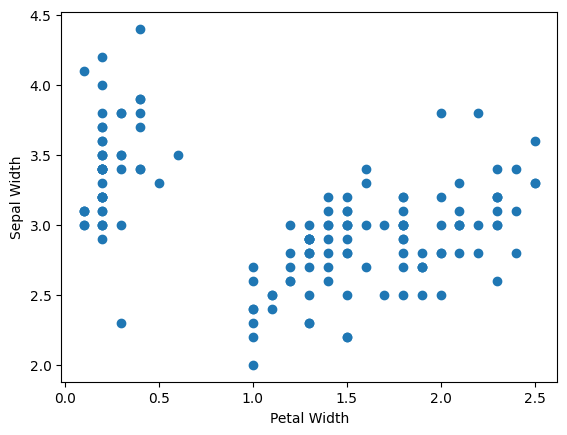

In [40]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


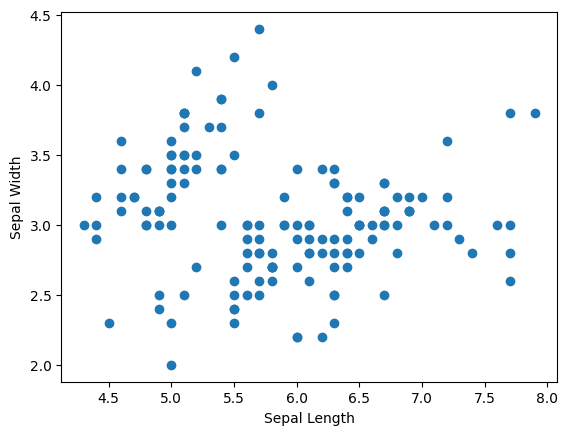

In [41]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


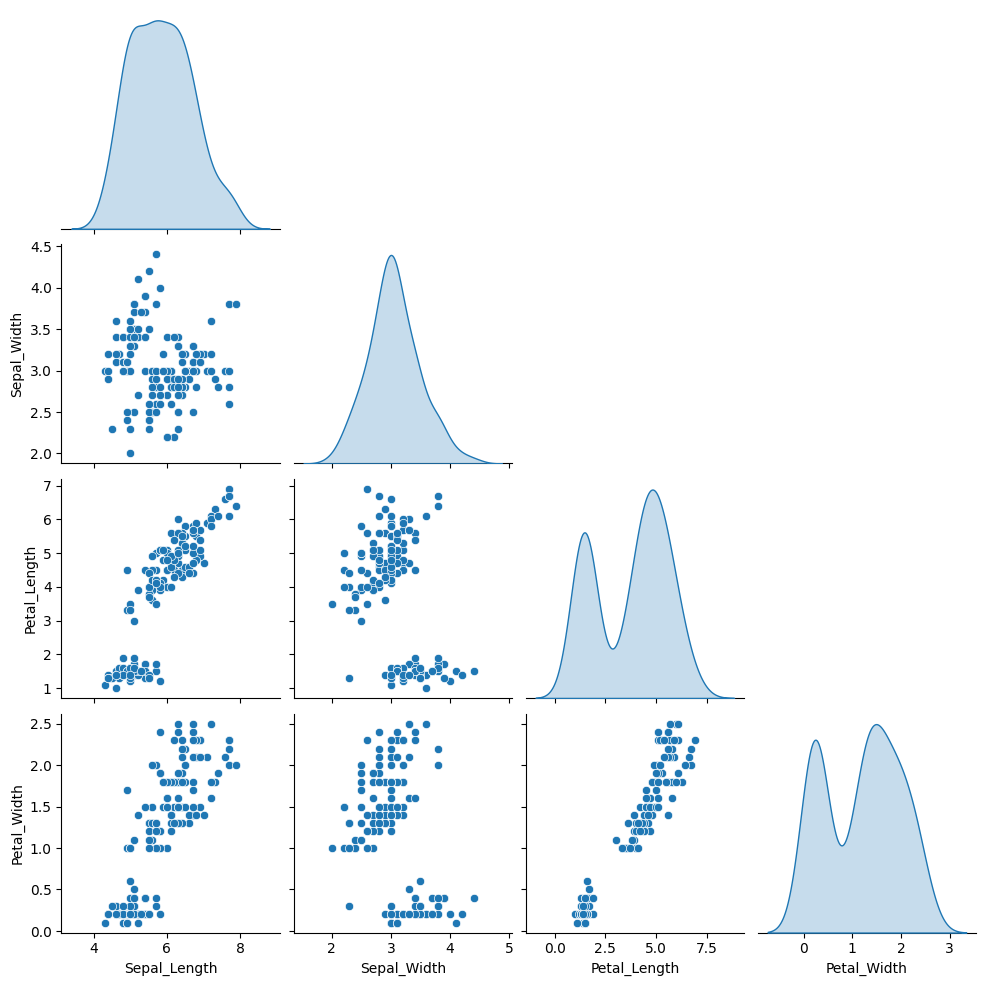

In [42]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


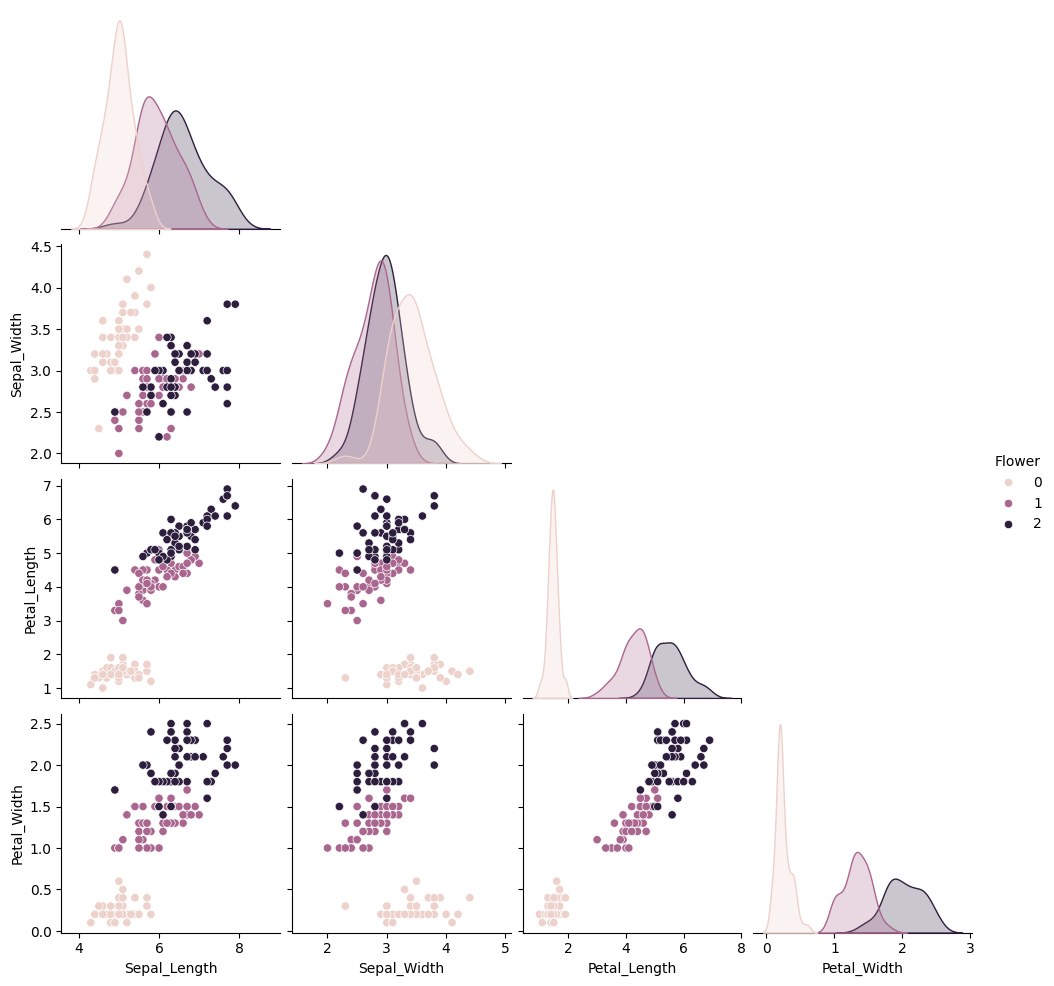

In [43]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [45]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


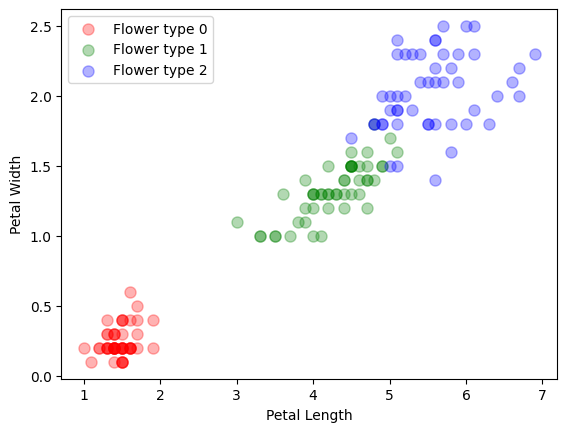

In [46]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


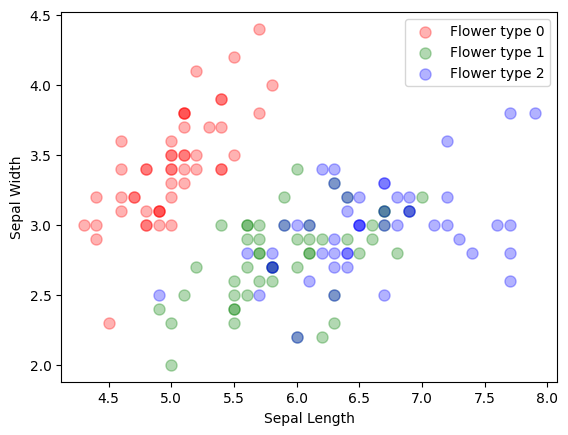

In [47]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [10]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#FlowerPred = km.fit_predict(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
#FlowerPred = km.fit_predict(dataset[['Sepal_Length','Sepal_Width']])
Cluster1 = km.fit_predict(dataset[['Petal_Length','Petal_Width']] )

# Print estimated cluster of each observations in the dataset
Cluster1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [11]:
# Print real cluster of each observations in the dataset
dataset.Flower.values


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [12]:
# Manual pairing of the labels of the estimated clusters with the real ones
Cluster1Paired = np.choose(Cluster1, [2, 0, 1]).astype(int) # CHANGE USING THE ORDER THE LABEL ESTIMATED
Cluster1Paired


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
# Automatic pairing of the labels of the estimated clusters with the real ones: WORK IN PROGRESS

# Import library
from sklearn.metrics.pairwise import pairwise_distances_argmin

X = dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']].values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Centroides of the real clusters
real_cluster_centers = np.array([
    [5.0, 3.4, 1.5, 0.2],
    [6.5, 3.0, 5.5, 2.0],
    [6.0, 2.9, 4.5, 1.5]
])

# Centroides of the estimated clusters
esti_cluster_centers = kmeans.cluster_centers_

# Compute order for the estimated clusters
order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers )

# Get ordered estimated clusters
esti_cluster_centers = esti_cluster_centers[order]

# Get paired labels
real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
esti_cluster_lables = pairwise_distances_argmin(X, esti_cluster_centers)


# NOTE: Use info in https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#establishing-parity-between-clusters

In [20]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = Cluster1Paired

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [21]:
# Print the existing labels/names of the estimated clusters (use the method unique)
dataset.Cluster1.unique()


array([0, 1, 2])

In [22]:
# Print cluster centroides
km.cluster_centers_

# NOTE: centroides also need to be paired


array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [23]:
# Print sum of squared error (sse) of the final model
km.inertia_


31.38775897435898

In [24]:
# Print the number of iterations required to converge
km.n_iter_


5

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters


## Plot estimated clusters and centrodes

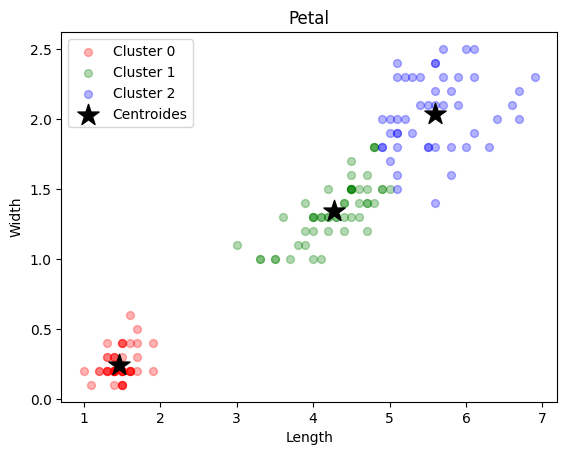

In [25]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

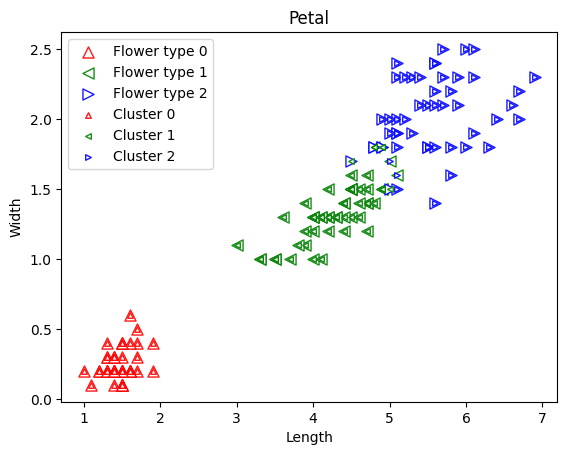

In [57]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [26]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


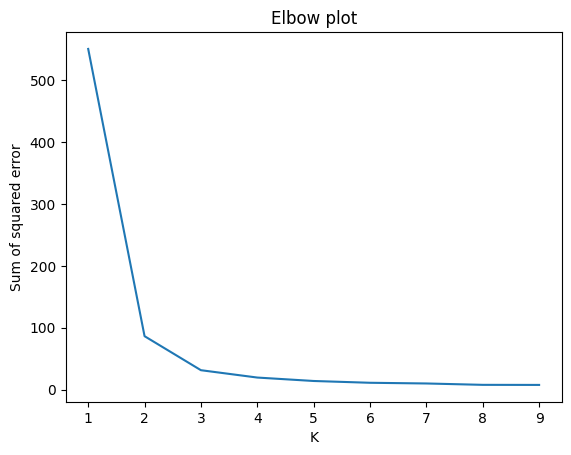

In [59]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



Centroides de los clústeres: [[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]
Suma de errores cuadrados (SSE): 31.38775897435898


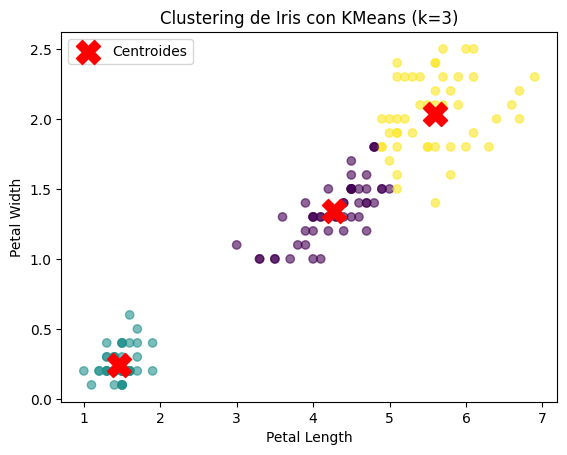

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Cluster1  Cluster  
0         0        1  
1         0        1  
2         0        1  
3         0        1  
4         0        1  


In [27]:
# Ajustamos el modelo KMeans con k=3
kmeans = KMeans(n_clusters=3, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset[['Petal_Length', 'Petal_Width']])

# Mostrar los centros de los clústeres
print("Centroides de los clústeres:", kmeans.cluster_centers_)

# Mostrar la suma de los errores cuadrados (SSE)
print("Suma de errores cuadrados (SSE):", kmeans.inertia_)

# Graficar los resultados
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'], c=dataset['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clustering de Iris con KMeans (k=3)')
plt.legend()
plt.show()

# Mostrar las primeras filas del dataset con la asignación de clúster
print(dataset.head())

Centroides de los clústeres: [[4.92525253 1.68181818]
 [1.49411765 0.26078431]]
Suma de errores cuadrados (SSE): 86.40394533570999


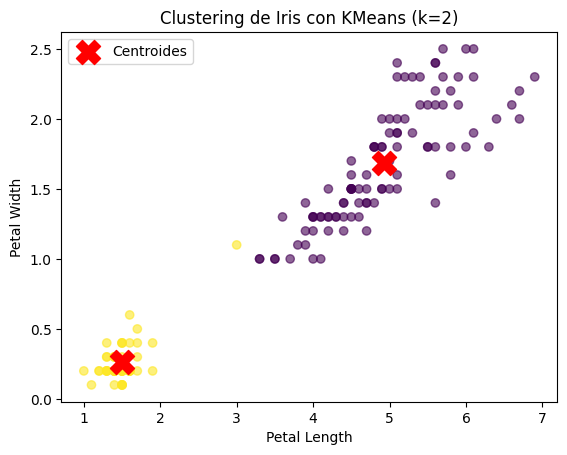

   Sepal_Length  Sepal_Width  Petal_Length  Petal_Width       Flower  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   Cluster1  Cluster  
0         0        1  
1         0        1  
2         0        1  
3         0        1  
4         0        1  


In [28]:
# Ajustamos el modelo KMeans con k=2
kmeans = KMeans(n_clusters=2, random_state=42)
dataset['Cluster'] = kmeans.fit_predict(dataset[['Petal_Length', 'Petal_Width']])

# Mostrar los centros de los clústeres
print("Centroides de los clústeres:", kmeans.cluster_centers_)

# Mostrar la suma de los errores cuadrados (SSE)
print("Suma de errores cuadrados (SSE):", kmeans.inertia_)

# Graficar los resultados
plt.scatter(dataset['Petal_Length'], dataset['Petal_Width'], c=dataset['Cluster'], cmap='viridis', marker='o', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clustering de Iris con KMeans (k=2)')
plt.legend()
plt.show()

# Mostrar las primeras filas del dataset con la asignación de clúster
print(dataset.head())

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

El gráfico de "Elbow Plot" muestra cómo la suma del error cuadrado (SSE) disminuye a medida que se aumenta el número de clusters (k). En este caso, el gráfico sugiere que el valor óptimo de k es 3, ya que después de este valor, la reducción en SSE es mínima.

En el gráfico de "Clustering de Iris con KMeans (k=3)", se pueden ver los puntos de datos agrupados en tres clusters, con sus respectivos centroides marcados en rojo. El uso del algoritmo KMeans con k=3 parece ser el más adecuado para este conjunto de datos, ya que permite una clasificación clara y coherente entre las diferentes especies de flores.

Conclusión: El número de clusters ideal es 3, lo que coincide con las tres clases de flores en el conjunto de datos Iris.